
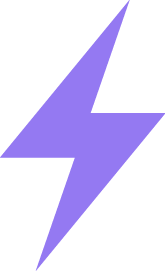

Running local mode, some functionality limited.



In [1]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb
from geopy.distance import lonlat, distance, geodesic
import os
import tarfile
pd.options.display.max_columns = 100
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#from citypairs.ipynb
df = pd.read_csv('distances.csv').sort_values('pop', ascending = False).drop_duplicates(['power'])

In [3]:
df.head()

Unnamed: 0  Unnamed: 0.1         2016        2016_x Country Code  \
15546481    15548630          3554  126994511.0  4.865342e+07          JPN   
5589745      5590518          3554  126994511.0  2.076529e+08          JPN   
1718485      1718723          3554  126994511.0  4.384743e+07          JPN   
13788133    13790039          3554  126994511.0  1.378665e+09          JPN   
13542109    13543981          3554  126994511.0  1.378665e+09          JPN   

         Country Code_x   city city_ascii city_ascii_x    city_x country  \
15546481            COL  Tokyo      Tokyo      Cienaga   Cienaga   Japan   
5589745             BRA  Tokyo      Tokyo     Araguari  Araguari   Japan   
1718485             ARG  Tokyo      Tokyo       Tandil    Tandil   Japan   
13788133            CHN  Tokyo      Tokyo       Xining    Xining   Japan   
13542109            CHN  Tokyo      Tokyo     Shaoguan  Shaoguan   Japan   

          country_x  index  index_x iso2 iso2_x iso3 iso3_x        lat  \
15546481   Colombia    NaN     2147   JP     CO  JPN    COL  35.685017   
5589745      Brazil    NaN      771   JP     BR  JPN    BRA  35.685017   
1718485   Argentina    NaN      236   JP     AR  JPN    ARG  35.685017   
13788133      China    NaN     1904   JP     CN  JPN    CHN  35.685017   
13542109      China    NaN     1870   JP     CN  JPN    CHN  35.685017   

              lat_x         lng       lng_x         pop     pop_x province  \
15546481  11.010399  139.751407  -74.250000  22006299.5  109741.0    Tokyo   
5589745  -18.640013  139.751407  -48.199988  22006299.5   79910.5    Tokyo   
1718485  -37.320010  139.751407  -59.150044  22006299.5   84799.5    Tokyo   
13788133  36.619999  139.751407  101.770005  22006299.5  907765.5    Tokyo   
13542109  24.799971  139.751407  113.579982  22006299.5  674507.5    Tokyo   

                      province_x  combined_pop      distance        power  
15546481               Magdalena    22116040.5  13729.819550  1610.803435  
5589745             Minas Gerais    22086210.0  17963.166295  1229.527670  
1718485   Ciudad de Buenos Aires    22091099.0  18325.045875  1205.513981  
13788133                   Gansu    22914065.0   3397.045153  6745.293032  
13542109               Guangdong    22680807.0   2781.089038  8155.368883

In [4]:
concise = df.sort_values('power', ascending = False)[['Country Code','Country Code_x','city','city_x','pop','pop_x','combined_pop','distance','power']]
concise['same'] = np.where(concise['Country Code'] == concise['Country Code_x'], 'yes', 'no')

In [5]:
concise.head()

Country Code Country Code_x            city       city_x         pop  \
6137255           BRA            BRA       Sao Paulo  Santo Andre  14433147.5   
15226630          COD            COG        Kinshasa  Brazzaville   6704351.5   
9666995           USA            CAN         Detroit      Windsor   2526135.0   
4392867           BGD            BGD           Dhaka  Narayanganj   9899167.0   
6035950           BRA            BRA  Rio de Janeiro      Niteroi   6879087.5   

              pop_x  combined_pop   distance         power same  
6137255    662373.0    15095520.5  14.392934  1.048815e+06  yes  
15226630  1259445.0     7963796.5   8.493706  9.376115e+05   no  
9666995    265068.5     2791203.5   3.868014  7.216115e+05   no  
4392867    223622.0    10122789.0  14.704493  6.884147e+05  yes  
6035950    993920.0     7873007.5  13.122406  5.999667e+05  yes

In [6]:
powerful = concise[concise['power'] > 100000]
print(powerful.shape)
print(concise.shape)

(85, 10)
(13800682, 10)


/home/matthew/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


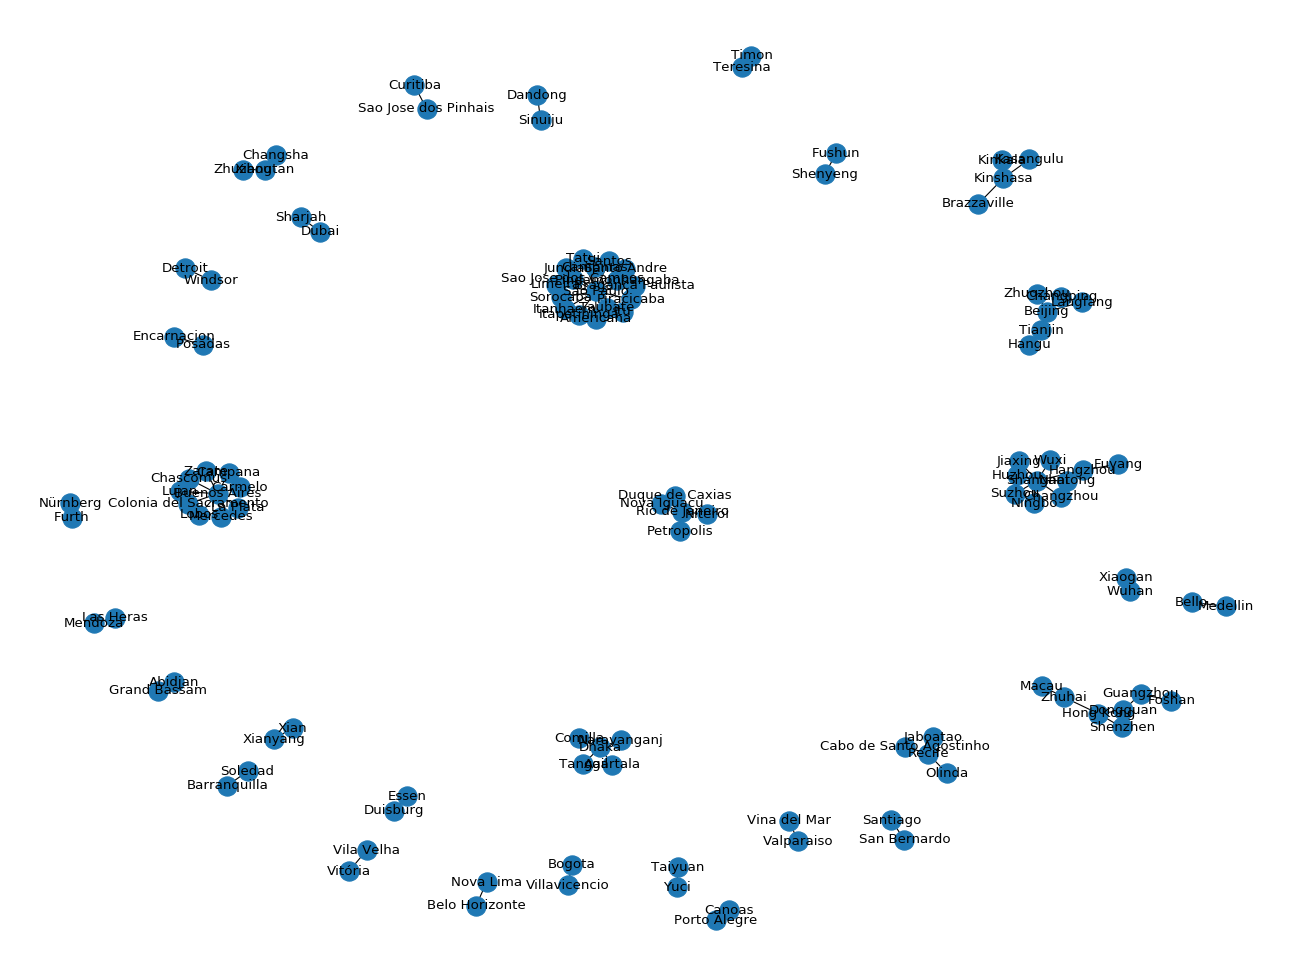

In [7]:
# https://python-graph-gallery.com/network-chart/
# https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
# Build your graph
G=nx.from_pandas_edgelist(powerful, 'city','city_x')

# Plot it
nx.draw(G, with_labels=True)
plt.show()

In [8]:
powerful = concise[concise['power'] > 3000]
# https://python-graph-gallery.com/network-chart/
# https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
# Build your graph
G=nx.from_pandas_dataframe(powerful, 'city','city_x')

# Plot it
nx.draw(G, with_labels=True, pos=nx.spectral_layout(G), width=50)
plt.show()
print(powerful.shape)

AttributeError: module 'networkx' has no attribute 'from_pandas_dataframe'

<Figure size 1280x960 with 0 Axes>

In [ ]:
nx.shortest_path(G, source='New York', target='Seattle')

In [ ]:
len([x for x in powerful['city_x'] if 'Seattle' in x])

In [ ]:
powerful = concise[concise['power'] > 6500]
# https://python-graph-gallery.com/network-chart/
# https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
# Build your graph
H=nx.from_pandas_dataframe(powerful, 'city','city_x')

# Plot it
nx.draw(H, with_labels=True, pos=nx.spectral_layout(G), width=50)
plt.show()
print(powerful.shape)

In [ ]:
nx.shortest_path(H, source='New York', target='Buenos Aires')

In [ ]:
powerful = concise[concise['distance'] < 500]
# https://python-graph-gallery.com/network-chart/
# https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
# Build your graph
I=nx.from_pandas_dataframe(powerful, 'city','city_x')

# Plot it
nx.draw(I, with_labels=True, pos=nx.spectral_layout(G), width=50)
plt.show()
print(powerful.shape)

In [ ]:
nx.shortest_path(I, source='San Francisco', target='Phoenix')